In [1]:
! pip install pandas
! pip install matplotlib
! pip install seaborn
! pip install scipy
! pip install kagglehub
! pip install seaborn
! pip install scikit-learn
! pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import norm
import seaborn as sns

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("imranalishahh/sales-and-customer-insights")

print("Path to dataset files:", path)

/opt/miniconda3/envs/ml/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/alexander/.cache/kagglehub/datasets/imranalishahh/sales-and-customer-insights/versions/1


In [4]:
import os
full_path = os.path.join(path, "sales_and_customer_insights.csv")
df = pd.read_csv(full_path)

In [5]:
df.head()

,Customer_ID,Product_ID,Transaction_ID,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,Launch_Date,Peak_Sales_Date,Season,Preferred_Purchase_Times,Retention_Strategy
0,CUST_9HOS83,PROD_IK97D1,TRANS_II1DZG,17,172.57,Electronics,45,South America,0.98,952.81,2020-03-14,2023-09-11,Winter,Afternoon,Loyalty Program
1,CUST_AJU17N,PROD_UNN7KP,TRANS_9HJF7I,10,64.89,Clothing,6,South America,0.66,5427.51,2022-10-15,2023-01-02,Spring,Afternoon,Discount
2,CUST_11XNYF,PROD_0XEW2W,TRANS_OT96OM,3,120.38,Sports,23,Asia,0.60,3994.80,2021-11-30,2023-04-06,Winter,Evening,Loyalty Program
3,CUST_IGH8G3,PROD_3IIAJN,TRANS_45V00G,12,70.34,Clothing,5,North America,0.78,4880.01,2022-03-20,2023-03-23,Spring,Evening,Discount
4,CUST_OK6PUM,PROD_VMIWD2,TRANS_ZAK760,18,42.39,Electronics,10,North America,0.52,8557.70,2022-11-09,2023-10-28,Spring,Morning,Discount


## **Summary statistics**

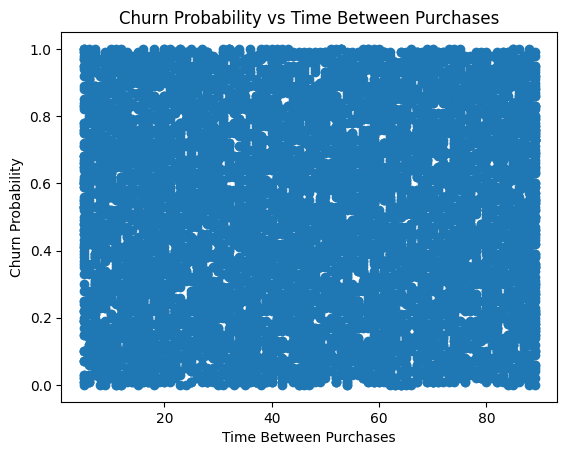

In [6]:
# ... existing code ...
churn = df['Churn_Probability']
timeBetween = df['Time_Between_Purchases']

# Ensure that timeBetween is sorted if necessary for a proper line chart
plt.scatter(timeBetween, churn)
plt.title('Churn Probability vs Time Between Purchases')  # Optional: Add a title
plt.xlabel('Time Between Purchases')  # Optional: Label for x-axis
plt.ylabel('Churn Probability')  # Optional: Label for y-axis
plt.show()
# ... existing code .

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               10000 non-null  object 
 1   Product_ID                10000 non-null  object 
 2   Transaction_ID            10000 non-null  object 
 3   Purchase_Frequency        10000 non-null  int64  
 4   Average_Order_Value       10000 non-null  float64
 5   Most_Frequent_Category    10000 non-null  object 
 6   Time_Between_Purchases    10000 non-null  int64  
 7   Region                    10000 non-null  object 
 8   Churn_Probability         10000 non-null  float64
 9   Lifetime_Value            10000 non-null  float64
 10  Launch_Date               10000 non-null  object 
 11  Peak_Sales_Date           10000 non-null  object 
 12  Season                    10000 non-null  object 
 13  Preferred_Purchase_Times  10000 non-null  object 
 14  Retenti

In [8]:
df.isnull().sum()

Customer_ID                 0
Product_ID                  0
Transaction_ID              0
Purchase_Frequency          0
Average_Order_Value         0
Most_Frequent_Category      0
Time_Between_Purchases      0
Region                      0
Churn_Probability           0
Lifetime_Value              0
Launch_Date                 0
Peak_Sales_Date             0
Season                      0
Preferred_Purchase_Times    0
Retention_Strategy          0
dtype: int64

In [9]:
df["Customer_ID"].nunique()

10000

In [10]:
df.describe()

,Purchase_Frequency,Average_Order_Value,Time_Between_Purchases,Churn_Probability,Lifetime_Value
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.955700,110.006022,46.885300,0.501552,5031.930567
std,5.526209,52.096870,24.711746,0.288289,2865.420299
min,1.000000,20.010000,5.000000,0.000000,100.160000
25%,5.000000,65.262500,25.000000,0.250000,2518.775000
50%,10.000000,109.930000,47.000000,0.500000,5012.180000
75%,15.000000,155.480000,68.000000,0.750000,7526.232500
max,19.000000,199.960000,89.000000,1.000000,9999.760000


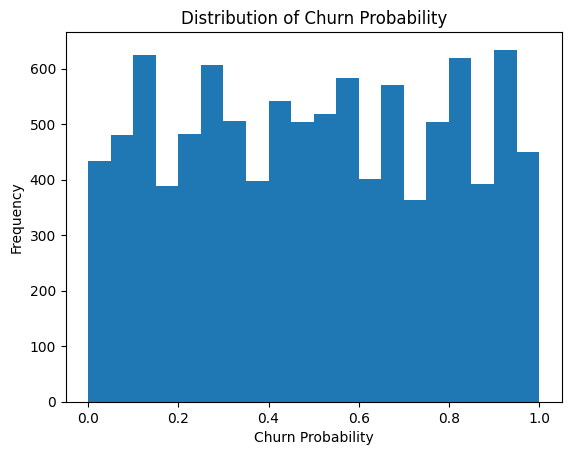

In [11]:
# Distribution of churn probabilities
import matplotlib.pyplot as plt
plt.hist(df['Churn_Probability'], bins=20)
plt.title('Distribution of Churn Probability')
plt.xlabel('Churn Probability')
plt.ylabel('Frequency')
plt.show()

## **Investigate the relationships between numeric features**

**Purchase_Frequency**: Customers with a higher number of purchases may be less likely to churn.  

**Average_Order_Value**: Higher spending could be associated with lower churn risk.  

**Lifetime_Value**: This is a key indicator of customer loyalty and future revenue.  

**Time_Between_Purchases**: If this is high, the customer may be at higher risk of churning.  

**Preferred_Purchase_Times**: Frequent buyers at certain times might have different churn probabilities.  

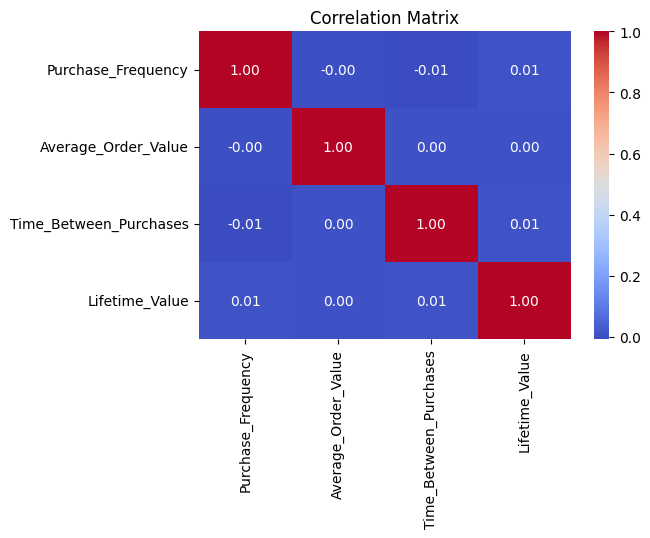

In [12]:
import seaborn as sns

numeric_df = df.select_dtypes(include='number').drop("Churn_Probability", axis=1)

corr_matrix = numeric_df.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## **Plot the distribution of categorical variables**

**Region**: Geographic regions may show different churn patterns.  

**Most_Frequent_Category**: The type of products the customer buys might be an indicator.  

**Retention_Strategy**: The method used for retaining the customer may affect churn.  

**Season**: Churn could vary by seasonality of purchases.  

In [13]:
cat_cols = df.select_dtypes(include='object').drop(["Product_ID", "Launch_Date", "Peak_Sales_Date", "Customer_ID", "Transaction_ID"], axis=1)
cat_cols

,Most_Frequent_Category,Region,Season,Preferred_Purchase_Times,Retention_Strategy
0,Electronics,South America,Winter,Afternoon,Loyalty Program
1,Clothing,South America,Spring,Afternoon,Discount
2,Sports,Asia,Winter,Evening,Loyalty Program
3,Clothing,North America,Spring,Evening,Discount
4,Electronics,North America,Spring,Morning,Discount
...,...,...,...,...,...
9995,Clothing,Europe,Winter,Evening,Loyalty Program
9996,Clothing,Europe,Spring,Morning,Loyalty Program
9997,Home,Asia,Spring,Evening,Discount
9998,Electronics,North America,Summer,Morning,Discount


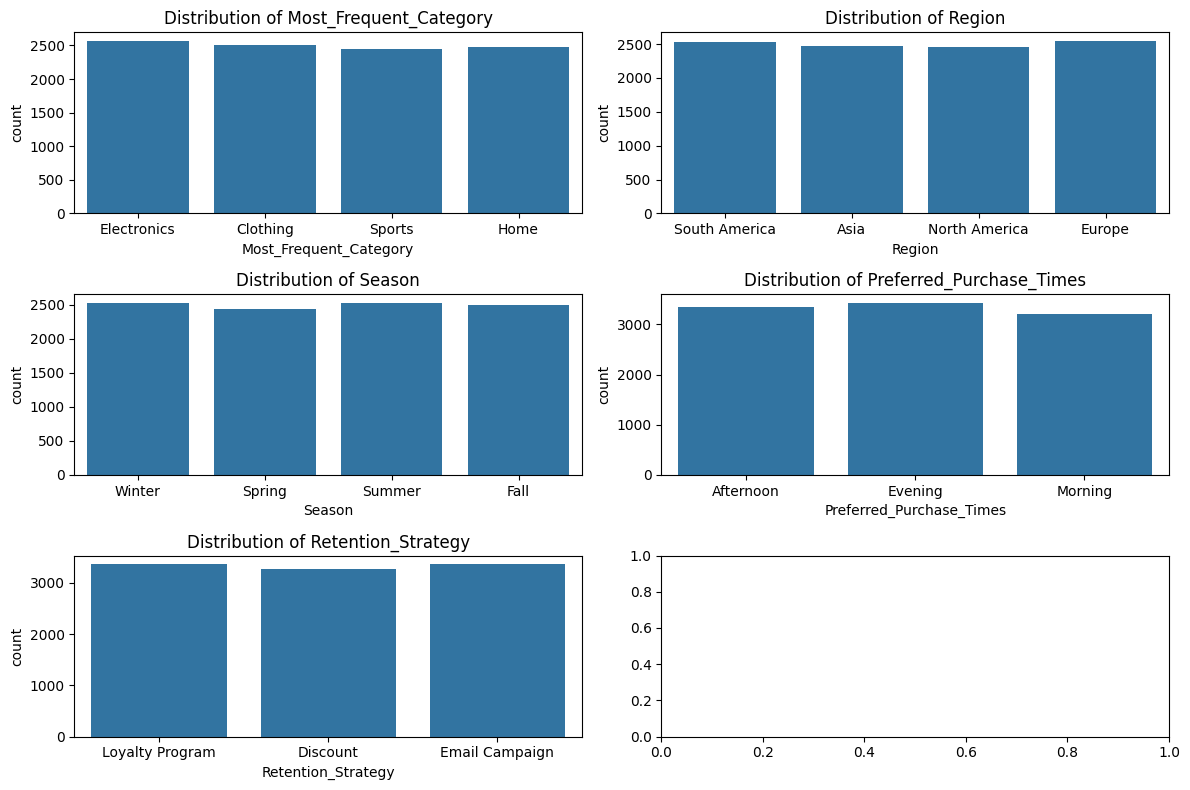

In [14]:
fig, ax = plt.subplots(3, 2, figsize=(12, 8))

for i, cat in enumerate(cat_cols):
    sns.countplot(x=cat, data=df, ax=ax[i // 2, i % 2])  # Specify the subplot axis
    ax[i // 2, i % 2].set_title(f'Distribution of {cat}')  # Set title for each subplot

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## **Categorical Feature-Target Relationship**

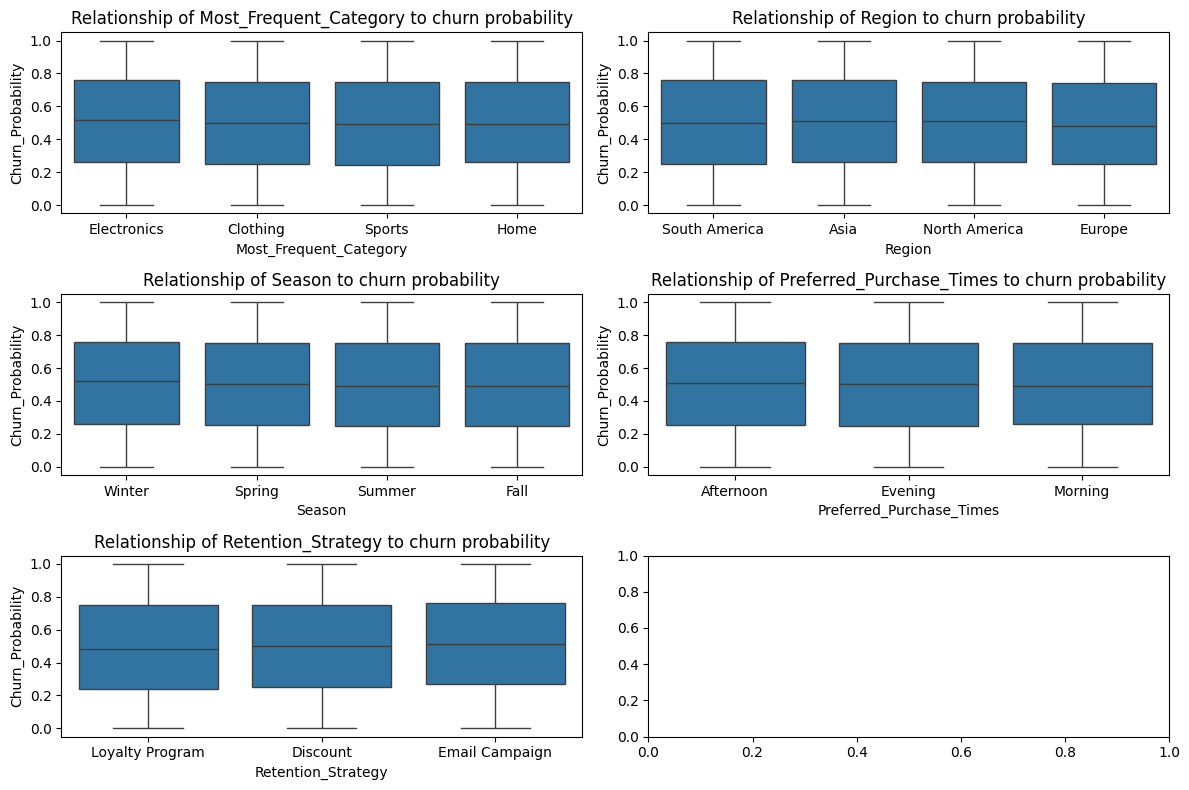

In [15]:
fig,ax = plt.subplots(3,2, figsize=(12,8))

for i, cat in enumerate(cat_cols):
    sns.boxplot(x=cat, y="Churn_Probability", data=df, ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title(f"Relationship of {cat} to churn probability")

plt.tight_layout()
plt.show()

## **Encode categorical variables**

In [16]:
columns_to_drop = ["Product_ID", "Launch_Date", "Peak_Sales_Date", "Customer_ID", "Transaction_ID"]
df_updated = df.drop(columns_to_drop, axis=1)
df_updated.columns

Index(['Purchase_Frequency', 'Average_Order_Value', 'Most_Frequent_Category',
       'Time_Between_Purchases', 'Region', 'Churn_Probability',
       'Lifetime_Value', 'Season', 'Preferred_Purchase_Times',
       'Retention_Strategy'],
      dtype='object')

In [17]:
# One-hot encoding for categorical variables where categories don’t have an ordinal relationship.
df_encoded = pd.get_dummies(df_updated, columns=['Region', 'Season', 'Most_Frequent_Category', 'Retention_Strategy', 'Preferred_Purchase_Times']).astype(int)
df_encoded.head()

,Purchase_Frequency,Average_Order_Value,Time_Between_Purchases,Churn_Probability,Lifetime_Value,Region_Asia,Region_Europe,Region_North America,Region_South America,Season_Fall,...,Most_Frequent_Category_Clothing,Most_Frequent_Category_Electronics,Most_Frequent_Category_Home,Most_Frequent_Category_Sports,Retention_Strategy_Discount,Retention_Strategy_Email Campaign,Retention_Strategy_Loyalty Program,Preferred_Purchase_Times_Afternoon,Preferred_Purchase_Times_Evening,Preferred_Purchase_Times_Morning
0,17,172,45,0,952,0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,0
1,10,64,6,0,5427,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
2,3,120,23,0,3994,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,12,70,5,0,4880,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
4,18,42,10,0,8557,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1


## **Model 1**

In [18]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn_Probability', axis=1)
y = df_encoded['Churn_Probability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.005458933333333332
Mean Absolute Error: 0.01314
R² Score: -0.09727303182579505


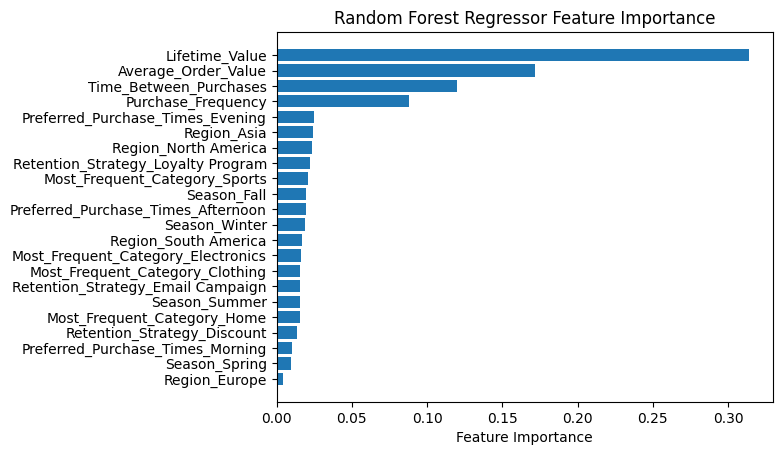

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Feature Importance
feature_importances = model.feature_importances_
sorted_idx = np.argsort(feature_importances)

plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Regressor Feature Importance")
plt.show()

In [22]:
feature_df = pd.DataFrame({
    'Feature': X.columns[sorted_idx],
     'Importance': feature_importances[sorted_idx]
    })
feature_df.sort_values(by='Importance', ascending=False, inplace=True)
feature_df.set_index('Feature', inplace=True)
feature_df

,Importance
Feature,
Lifetime_Value,0.313886
Average_Order_Value,0.171945
Time_Between_Purchases,0.119568
Purchase_Frequency,0.088205
Preferred_Purchase_Times_Evening,0.025112
Region_Asia,0.024369
Region_North America,0.023793
Retention_Strategy_Loyalty Program,0.022132
Most_Frequent_Category_Sports,0.020804


## **Model using most important features**

In [23]:
# Select the top 5 most important features based on the feature importance plot
top_features = ['Retention_Strategy_Loyalty Program', 'Retention_Strategy_Discount', 
                'Retention_Strategy_Email Campaign', 'Lifetime_Value', 
                'Preferred_Purchase_Times_Evening']

# Subset the data to only include the top features
X_top_features = X[top_features]

# Train a new Random Forest Regressor with the top features
rf_top_features = RandomForestRegressor()
rf_top_features.fit(X_top_features, y)

# Evaluate the performance (compare it with the full feature model)
y_pred_top_features = rf_top_features.predict(X_top_features)

In [24]:
from sklearn.model_selection import cross_val_score

# Cross-validate the full model
scores_full = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Cross-validate the model with top features
scores_top_features = cross_val_score(rf_top_features, X_top_features, y, cv=5, scoring='neg_mean_squared_error')

print("Full Model CV Scores:", scores_full)
print("Top Features Model CV Scores:", scores_top_features)

NameError: name 'rf_model' is not defined

## **Model that scales features**

In [185]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [235]:
numeric_cols = ["Churn_Probability", "Purchase_Frequency", "Average_Order_Value", "Time_Between_Purchases", "Lifetime_Value"]
category_cols = ["Most_Frequent_Category", "Region", "Season", "Retention_Strategy"]
cols_to_keep = numeric_cols + category_cols
df_filtered = df[cols_to_keep]
df_filtered.head()

,Churn_Probability,Purchase_Frequency,Average_Order_Value,Time_Between_Purchases,Lifetime_Value,Most_Frequent_Category,Region,Season,Retention_Strategy
0,0.98,17,172.57,45,952.81,Electronics,South America,Winter,Loyalty Program
1,0.66,10,64.89,6,5427.51,Clothing,South America,Spring,Discount
2,0.60,3,120.38,23,3994.80,Sports,Asia,Winter,Loyalty Program
3,0.78,12,70.34,5,4880.01,Clothing,North America,Spring,Discount
4,0.52,18,42.39,10,8557.70,Electronics,North America,Spring,Discount


In [240]:
# Perform one-hot encoding for categorical columns
df_dummies = pd.get_dummies(df_filtered, columns=category_cols)

# Get the newly created dummy columns (these are the one-hot encoded columns)
dummy_columns = [col for col in df_dummies.columns if any(cat in col for cat in category_cols)]

# Convert only the dummy columns to int (ignoring Churn_Probability and other numeric columns)
df_dummies[dummy_columns] = df_dummies[dummy_columns].astype('int')

# View the result
df_dummies.head()

,Churn_Probability,Purchase_Frequency,Average_Order_Value,Time_Between_Purchases,Lifetime_Value,Most_Frequent_Category_Clothing,Most_Frequent_Category_Electronics,Most_Frequent_Category_Home,Most_Frequent_Category_Sports,Region_Asia,Region_Europe,Region_North America,Region_South America,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Retention_Strategy_Discount,Retention_Strategy_Email Campaign,Retention_Strategy_Loyalty Program
0,0.98,17,172.57,45,952.81,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
1,0.66,10,64.89,6,5427.51,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0
2,0.60,3,120.38,23,3994.80,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
3,0.78,12,70.34,5,4880.01,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0
4,0.52,18,42.39,10,8557.70,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0


In [241]:
X = df_dummies.drop('Churn_Probability', axis=1)
y = df_dummies["Churn_Probability"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [248]:
feature_cols = ["Purchase_Frequency", "Average_Order_Value", "Time_Between_Purchases", "Lifetime_Value"]

scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, feature_cols)
    ],
    remainder= 'passthrough'
)

rf_model = RandomForestRegressor()

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", rf_model)
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

In [249]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mse = mean_absolute_error(y_test, y_pred)
mse = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Squared Error: -0.034554384393802096
Mean Absolute Error: 0.011469428571428573
R² Score: -0.2526191448696471


In [253]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and model
print(grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

KeyboardInterrupt: 